In [2]:
from readdata import read_images
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist

training_data, training_labels = read_images('../Yale_Face_Database/Training/')
testing_data, testing_labels = read_images('../Yale_Face_Database/Testing/')

def get_A(data):
    data_ = np.array(data)
    mean = np.mean(data_,axis=1)
    A = np.array([i-j for (i,j) in zip(data_, mean)])
    A /= np.sqrt(np.size(data_,axis=1)-1)
    return A.T

def get_projected(xs,y):
    # projected x onto y
    # xs contains serveral x, projected x onto y, and return ys
    xs_ = np.array(xs)
    y_norm = np.dot(y,y)
    for x in xs_:
        x = y * np.dot(x,y) / y_norm
    return xs_

def k_nearest_neighbor(dists, k, training_labels):
    # dist: distance toward every other points
    # we only utilize (training_points, testing_points) pair
    # spanned by test_num X training_num
    label = np.array(training_labels)
    test_label = []
    for test_points in dists:
        idx = np.argpartition(test_points, k)
        test_label.append( np.argmax( np.bincount( label[idx[:k]] )))
    return test_label

In [3]:
v = np.array([[3,4,2],[6,1,-8],[7,7,4]])
w = np.array([14,6,7])

x = np.linalg.solve(v,w)
print(x)

x1,x2,x3 = proj(v[0],w), proj(v[1],w), proj(v[2],w)

print(proj(v[0],w)+proj(v[1],w)+proj(v[2],w))


[-8.42857143 12.57142857 -5.5       ]


NameError: name 'proj' is not defined

In [7]:
# print(v@sol)
# def proj(x,y):
#     return y*np.dot(x,y)/np.dot(y,y)
# print(proj(v[0],w)+proj(v[1],w)+proj(v[2],w))

In [8]:
A = get_A(training_data)

# C = A @ A.T

# sort
vals , vecs = np.linalg.eig(A.T @ A)
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
vecs = np.flip(vecs,axis=0)
vals = np.flip(vals)

v = A@vecs[0]
v2 = A@vecs[1]
v3 = A@vecs[2]

# method project onto a single eigenvector
# train_projected = get_projected(training_data, v)
# test_projected = get_projected(testing_data, v)

train_projected = get_projected(training_data, v) + get_projected(training_data, v2) + get_projected(training_data, v3)
test_projected = get_projected(testing_data, v) + get_projected(testing_data, v2) + get_projected(testing_data, v3)

# method project onto eigensapce build from more than two eigen bases
# V = vecs[:3].T
# train_projected = (np.linalg.inv(V.T@V)@V.T@((training_data@A_tn).T)).T
# test_projected = (np.linalg.inv(V.T@V)@V.T@((testing_data@A_tn).T)).T


# print(test_projected.shape)

# calculate the distance between each [training data points], [testing data points] pair
dist_testXtrain = cdist(test_projected, train_projected)


# print(dist_testXtrain.shape)

test_label = k_nearest_neighbor(dist_testXtrain, 8, training_labels)
# print(test_label)

In [30]:
def RBF_distance(A,C):
    tmpA = np.array(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            tmpA[i][j] = np.dot(x-y)*np.dot(x-y)
    tmpA /= C
    tmpA = np.exp(tmpA)
    return tmp
def RBF_kernel(traind):
    A = get_A(datas1)
    C = A.T @ A
    RBF_kernel = RBF_distance(A,C)
    return RBF_kernel
    

(30, 135)


In [32]:
def generate_eigen_faces(A, vecs):
    eigenfaces = (A@vecs[:25].T).T
    for i in range(25):
        plt.imsave("../output/reconstruction/PCA/reconstruction"+str(i)+".png", testing_data[i].reshape(231,195), cmap=plt.cm.gray)
generate_eigen_faces(A, vecs)

In [ ]:
# Adjust the training_data to fit the projection input
VoA = training_data @ A
projected = VoA @ vecs[:25].T
X_pca = training_data.T.dot(projected)
print(X_pca.shape)
eigenfaces = np.swapaxes(X_pca,0,1)
print(eigenfaces.shape)
for i in range(25):
    plt.imsave("../output/eigenfaces/eigenface"+str(i)+".png", eigenfaces[i].reshape(231,195), cmap=plt.cm.gray)
# plt.imshow(eigenfaces[24].reshape((231,195)),cmap=plt.cm.gray)

In [9]:
std_label = testing_labels
rank_list = []
for k in range(1,135):
    test_label = k_nearest_neighbor(dist_testXtrain, k, training_labels)
    cnt = 0
    for i in range(30):
        if test_label[i] == std_label[i]:
            cnt += 1
    rank_list.append(cnt)
print(rank_list)

[26, 25, 25, 26, 27, 28, 27, 28, 28, 27, 25, 25, 26, 26, 26, 25, 24, 23, 23, 22, 22, 22, 22, 22, 22, 22, 20, 20, 20, 20, 20, 20, 19, 19, 20, 20, 20, 20, 19, 19, 19, 19, 19, 17, 17, 17, 17, 17, 17, 16, 14, 14, 13, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [35]:
np.arange(1,135)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134])

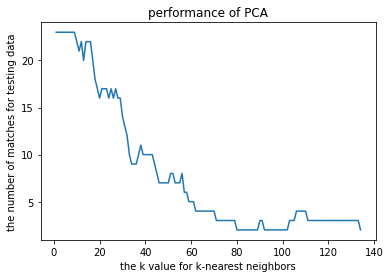

In [37]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,135),rank_list)
plt.title('performance of PCA')
plt.xlabel('the k value for k-nearest neighbors')
plt.ylabel('the number of matches for testing data')
plt.show()

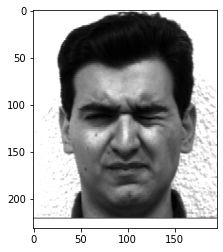

In [10]:
plt.imshow(testing_data[5].reshape((231,195)),cmap=plt.cm.gray)

In [11]:
A_tn = get_A(training_data)
print(A.shape)

# truth:
# C = A @ A.T

# sort
vals , vecs = np.linalg.eig( A_tn.T @ A_tn )
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
vecs = np.flip(vecs,axis=0)
vals = np.flip(vals)

# v = A.T @ vecs[134] / vals[134]
# v = A @ vecs[0] / vals[0]
v = vecs[0]
train_projected = get_projected(training_data@A_tn, v)

test_projected = get_projected(testing_data@A_tn, v)
print(test_projected.shape)

dist_testXtrain = cdist(test_projected, train_projected)
print(dist_testXtrain.shape)

# test_label = k_nearest_neighbor(dist_testXtrain, 8, training_labels)
# print(test_label)
std_label = [14,2,6,8,12,15,7,13,13,4,8,5,4,1,11,9,10,5,14,12,15,1,9,7,2,11,3,10,6,3]
rank_list = []
for k in range(1,135):
    test_label = k_nearest_neighbor(dist_testXtrain, k, training_labels)
    cnt = 0
    for i in range(30):
        if test_label[i] == std_label[i]:
            cnt += 1
    rank_list.append(cnt)
print(rank_list)

(45045, 135)
(30, 135)
(30, 135)
[23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 21, 22, 20, 22, 22, 22, 20, 18, 17, 16, 17, 17, 17, 16, 17, 16, 17, 16, 16, 14, 13, 12, 10, 9, 9, 9, 10, 11, 10, 10, 10, 10, 10, 9, 8, 7, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
